Bandra, Mumbai - MPCB


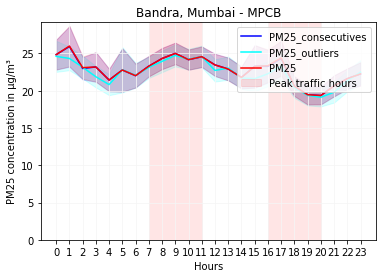

successfully cleaned  PM25   Bandra, Mumbai - MPCB


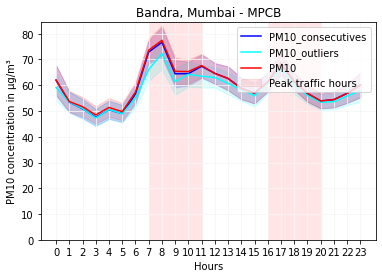

successfully cleaned  PM10   Bandra, Mumbai - MPCB


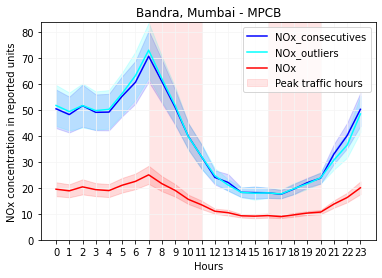

successfully cleaned  NOx   Bandra, Mumbai - MPCB


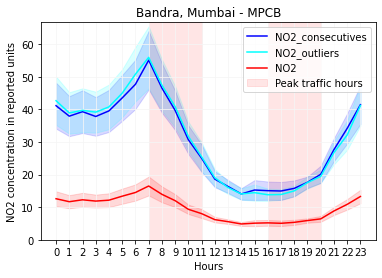

successfully cleaned  NO2   Bandra, Mumbai - MPCB


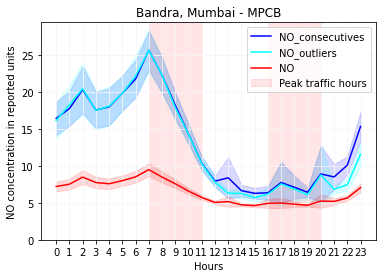

successfully cleaned  NO   Bandra, Mumbai - MPCB


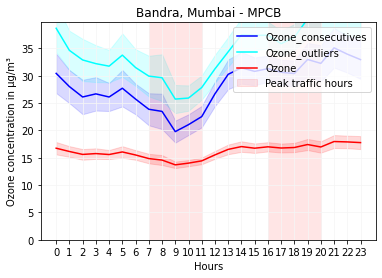

successfully cleaned  Ozone   Bandra, Mumbai - MPCB


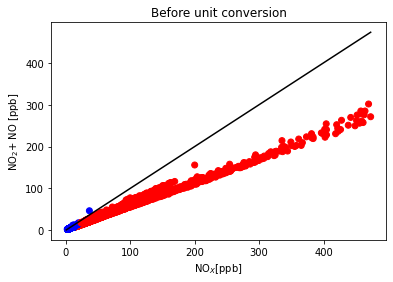

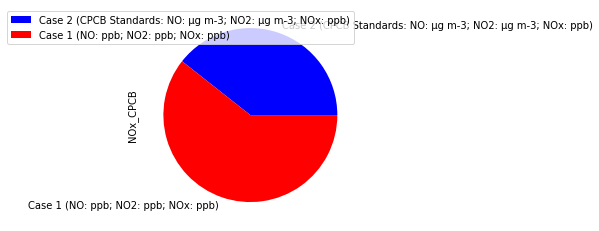

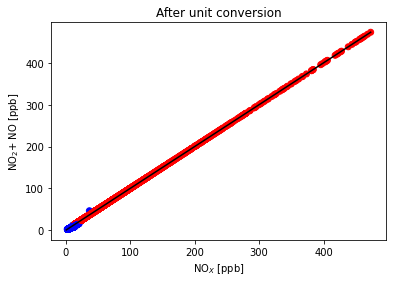

----------------------------------------------------------------------------------------
saved successfully forBandra, Mumbai - MPCB
----------------------------------------------------------------------------------------
Plammoodu, Thiruvananthapuram - Kerala PCB


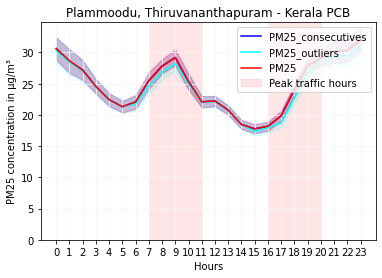

successfully cleaned  PM25   Plammoodu, Thiruvananthapuram - Kerala PCB


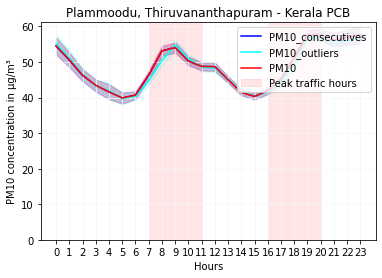

successfully cleaned  PM10   Plammoodu, Thiruvananthapuram - Kerala PCB


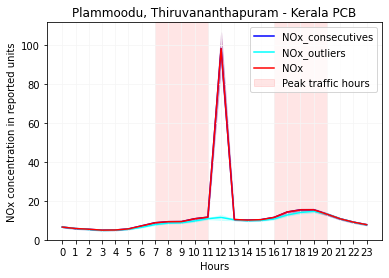

successfully cleaned  NOx   Plammoodu, Thiruvananthapuram - Kerala PCB


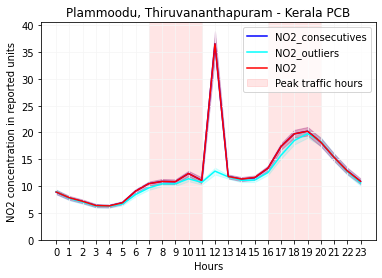

successfully cleaned  NO2   Plammoodu, Thiruvananthapuram - Kerala PCB


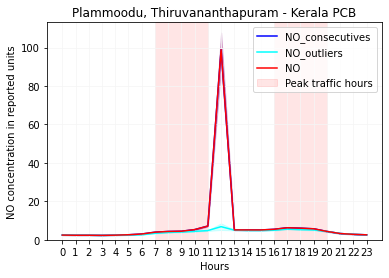

successfully cleaned  NO   Plammoodu, Thiruvananthapuram - Kerala PCB


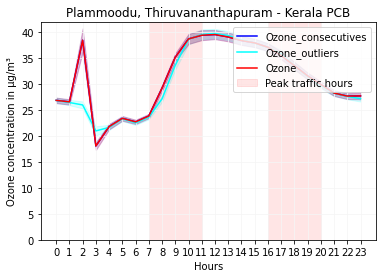

successfully cleaned  Ozone   Plammoodu, Thiruvananthapuram - Kerala PCB


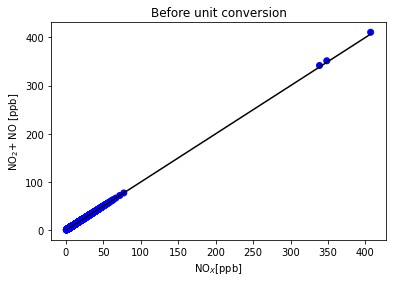

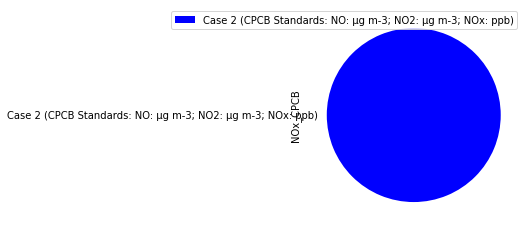

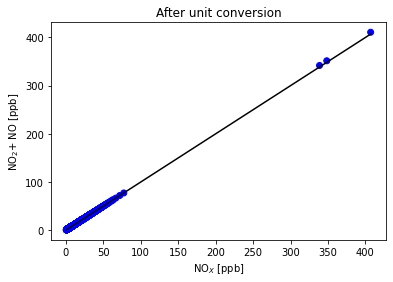

----------------------------------------------------------------------------------------
saved successfully forPlammoodu, Thiruvananthapuram - Kerala PCB
----------------------------------------------------------------------------------------


In [2]:
#importing necessary package
from main import  clean_dataset

#specifications from user
main_directory = r"E:\MTech_Project\CPCB_Datavalidation\aq_preprocessor\airpy"
year = 2020
mixed_unit_identification = False #to automate specify as False else, as True


#call the function inside main
clean_dataset(year, main_directory, mixed_unit_identification)